# Linear regression assumptions

In this notebook, we will review the assumptions underlying our analysis of [linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/multi_linreg.ipynb), and what happens when those assumptions are invalid. What we've covered so far goes under the umbrella of Ordinary Least Squares (OLS).

### Prerequisites
* [Simple linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/linreg.ipynb)
* [Multiple linear regression](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/multi_linreg.ipynb)

## Non-normal noise

### BLUE

We derived the OLS estimator $\hat{\beta}_{OLS}$ in two ways: (i) minimizing a cost function which is constructed from the sum of squared prediction errors, and (ii) maximizing the probability of observing the data set by assuming $Y \sim \mathcal{N}(X\beta, \sigma^2I_m)$, where as usual $X$ is the design matrix and $I_m$ is the $m$-dimensional identity matrix.

In the first method, we never spoke of the normal distribution, but came up with the cost function heuristically. In the second method, we did assume errors are normally distributed. So what's the deal? Is the OLS estimator $\hat{\beta}_{OLS}$ only valid if the residuals are normally distributed? To answer this question, consider the following model:

\begin{equation}
y^{(i)} = \beta^Tx^{(i)} + \epsilon^{(i)},
\end{equation}

where $\epsilon^{(1)}, \dots, \epsilon^{(m)}$ are *any* random variables satisfying:

\begin{equation}
\mathbb{E}[\epsilon^{(i)}] = 0, \qquad
\mathbb{E}[\epsilon^{(i)}\epsilon^{(i')}] = \sigma^2\delta_{ii'}.
\end{equation}

We can express these equations in matrix form:

\begin{equation}
Y = X\beta + \epsilon, \qquad
\mathbb{E}[\epsilon]  = 0, \qquad
\mathbb{E}[\epsilon\epsilon^T] = \sigma^2 I_m.
\end{equation}

Given that $\epsilon^{(i)}$ could be non-normal, is the OLS estimator $\hat{\beta}_{OLS}$ still unbiased? Recall that

\begin{equation}
\hat{\beta}_{OLS}=(X^TX)^{-1}X^T Y.
\end{equation}

Let's compute the expectation value of $\hat{\beta}_{OLS}$:

\begin{align*}
\mathbb{E}[\hat{\beta}_{OLS}]
    &= (X^TX)^{-1}X^T \mathbb{E}[Y] \\
    &= (X^TX)^{-1}X^T (X\beta + \mathbb{E}[\epsilon]) \\
    &= (X^TX)^{-1}X^TX\beta \\
    &= \beta.
\end{align*}

Nice! All we need for $\hat{\beta}_{OLS}$ to be unbiased is $\mathbb{E}[\epsilon] = 0$. We will compute the covariance $C[\hat{\beta}_{OLS}]$ of $\hat{\beta}_{OLS}$ next. First note that:

\begin{align*}
\hat{\beta}_{OLS} - \beta
    &= (X^TX)^{-1}X^TY - (X^TX)^{-1}(X^TX)\beta \\
    &= (X^TX)^{-1}X^T(Y - X\beta) \\
    &= (X^TX)^{-1}X^T\epsilon.
\end{align*}

Then:

\begin{align*}
C[\hat{\beta}_{OLS}]
    &= \mathbb{E}[(\hat{\beta}_{OLS} - \beta)(\hat{\beta}_{OLS} - \beta)^T] \\
    &= (X^TX)^{-1}X^T \mathbb{E}[\epsilon\epsilon^T] X(X^TX)^{-1} \\
    &= (X^TX)^{-1}X^T(\sigma^2 I_m)X(X^TX)^{-1} \\
    &= \sigma^2(X^TX)^{-1}.
\end{align*}

We had arrived at the same expression before when assuming errors are normally distributed. Here we see that there's no need for that assumption, so long as the errors are uncorrelated and have the same variance.

Could it be that there is some other linear estimator that is unbiased but has lower variance? In general, we can express any linear estimator $\tilde{\beta}$ as follows:

\begin{equation}
\tilde{\beta} \equiv CY, \qquad
C \equiv (X^TX)^{-1}X^T + D,
\end{equation}

where $D$ is any (for now) $(n+1)\times m$ dimensional matrix. We want $\tilde{\beta}$ to be unbiased:

\begin{align*}
\mathbb{E}[\tilde{\beta}]
    &= C \mathbb{E}[Y] \\
    &= CX\beta \\
    &= [(X^TX)^{-1}X^T + D]X\beta \\
    &= [I_{n+1} + DX]\beta,
\end{align*}

so we must have that

\begin{equation}
DX = 0.
\end{equation}

Let's compute the covariance $C[\tilde{\beta}]$ of $\tilde{\beta}$. First note that

\begin{align*}
\tilde{\beta} - \beta
    &= CY - [(X^TX)^{-1}X^TX + DX]\beta \\
    &= [(X^TX)^{-1}X^T + D]Y - [(X^TX)^{-1}X^T + D]X\beta \\
    &= [(X^TX)^{-1}X^T + D](Y - X\beta) \\
    &= C\epsilon,
\end{align*}

where the first equality uses $DX=0$. Then:

\begin{align*}
C[\tilde{\beta}]
    &= \mathbb{E}[(\tilde{\beta} - \beta)(\tilde{\beta} - \beta)^T] \\
    &= C\mathbb{E}[\epsilon\epsilon^T] C^T \\
    &= \sigma^2CC^T \\
    &= \sigma^2[(X^TX)^{-1}X^T + D][X(X^TX)^{-1} + D^T] \\
    &= \sigma^2[(X^TX)^{-1} + (X^TX)^{-1}(DX)^T + (DX)(X^TX)^{-1} + DD^T] \\
    &= \sigma^2(X^TX)^{-1} + \sigma^2 DD^T \\
    &= C[\hat{\beta}_{OLS}] + \sigma^2 DD^T,
\end{align*}

where the we have used $DX=0$. Looking at the diagonal elements of this matrix equation, we can see how the variance of the two estimators compare:

\begin{align*}
C[\tilde{\beta}]_{jj}
    &= C[\hat{\beta}_{OLS}]_{jj} + \sigma^2[DD^T]_{jj} \\
    &\ge C[\hat{\beta}_{OLS}]_{jj}.
\end{align*}

Therefore, $\hat{\beta}_{OLS}$ has the lowest variance of all linear estimators! That's why it's called the Best Linear Unbiased Estimator (BLUE), where best is in the sense of having the lowest variance. This remarkable result goes by the name of [Gauss–Markov theorem](https://en.wikipedia.org/wiki/Gauss%E2%80%93Markov_theorem).

Let's remember what we assumed: (i) errors have zero mean, (ii) errors are uncorrelated, (iii) errors have the same finite variance. If these assumptions are true, the OLS estimator is the best in town. Note that we don't even have to assume *independence*; the errors just have to be uncorrelated.


### Confidence intervals

Although the OLS estimator is BLUE, the confidence intervals we derived for $\hat{\beta}$ do assume normality. A natural question, then, is how robust the confidence intervals are when $\epsilon$ is not Gaussian noise. Recall that the normality assumption was necessary to show that

\begin{equation}
t_j = \frac{\hat{\beta}_j - \beta_j}{\sqrt{\hat{\sigma}^2[(X^TX)^{-1}]_{jj}}}
\end{equation}

follows the t-distribution with $m-n-1$ degrees of freedom, where

\begin{equation}
\hat{\sigma}^2 = \frac{1}{m-n-1}\hat{e}^T\hat{e}, \qquad
\hat{e} = Y - X\hat{\beta}.
\end{equation}

In [1]:
import numpy as np
from statsmodels import regression
from statsmodels.stats import diagnostic
import scipy.stats as stats
import matplotlib.pyplot as plt

# Make results reproducible
np.random.seed(123)

Let's generate data with the following non-Gaussian noise

\begin{equation}
\epsilon = e^Z - e^{\frac{1}{2}}, \qquad
Z \sim \mathcal{N}(0, 1).
\end{equation}

Mean of $\epsilon$ is still zero, but its distribution is now heavily skewed:

Mean of sample = 0.0121881387208


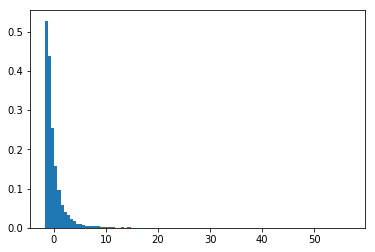

In [2]:
s = np.exp(np.random.normal(size=10000)) - np.exp(1/2.)
print("Mean of sample = {0}".format(np.mean(s)))
plt.hist(s, bins=100, normed=True);

Let's now generate some data using the model

\begin{equation}
y = 0.3 + 2 x_1 + 5 x_2 + \epsilon
\end{equation}

and run linear regression:

In [3]:
betas = np.array([0.3, 2, 5])
X = np.column_stack([np.ones(100), np.random.uniform(size=(100, 2))])
y = X.dot(betas) + np.exp(np.random.normal(size=100)) - np.exp(1/2.)

model = regression.linear_model.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     21.24
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           2.23e-08
Time:                        19:52:17   Log-Likelihood:                -217.92
No. Observations:                 100   AIC:                             441.8
Df Residuals:                      97   BIC:                             449.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6925      0.576      1.203      0.232      -0.450       1.835
x1             1.8252      0.767      2.381      0.019       0.303       3.347
x2             4.4555      0.768      5.804      0.000       2.932       5.979
==============================================================================
Omnibus:                       88.593   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.446
Skew:                           2.991   Prob(JB):                    5.80e-147
Kurtosis:                      14.218   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that p-value associated with the Jarque-Bera test is extremely small, since the errors are coming from a highly skewed distribution. We can also see this by plotting the histogram of residuals:

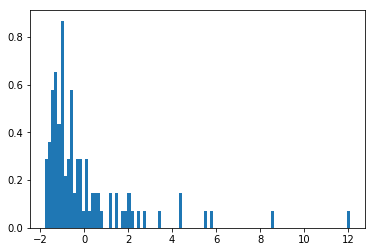

In [4]:
plt.hist(model.resid, bins=100, normed=True);

Let's compute the distribution of $t_j$ empirically and compare it to the t-distribution with $m-3$ degrees of freedom:

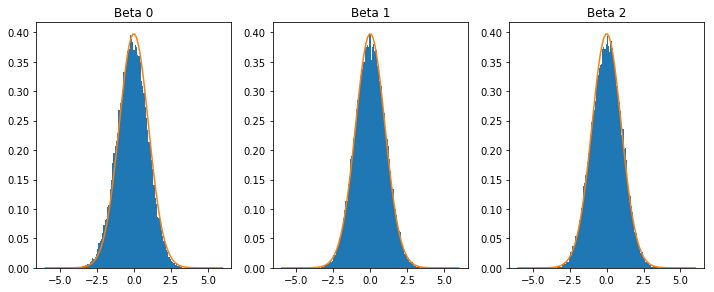

In [5]:
def empirical_t(X_, betas_r):
    (m, p) = X_.shape
    n = p - 1

    # Quantities that will not change during the simulation
    D = np.linalg.inv(X_.T.dot(X_))
    A = D.dot(X_.T)

    # Number of times to compute t values
    trials = 50000
    tvals = np.zeros((trials, n + 1))

    for i in range(trials):
        # Simulate noise
        noise = np.exp(np.random.normal(size=m)) - np.exp(1/2.)
        # Compute y
        y_ = X_.dot(betas_r) + noise
        # OLS estimator
        betas_est = A.dot(y_)
        # Residuals
        e_ = y_ - X_.dot(betas_est)
        # Standard error of estimates
        se = np.sqrt(1.0/(m - 2) * np.dot(e_, e_) * np.diag(D))
        # t values
        tvals[i,:] = (betas_est - betas_r) / se

    # Plot results
    tx = np.linspace(-6, 6, 100)

    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(10, 4)
    fig.tight_layout()

    for i in range(n + 1):
        axes[i].hist(tvals[:, i], bins=100, normed=True);
        axes[i].plot(tx, stats.t.pdf(tx, m - n - 1))
        axes[i].set_title("Beta {0}".format(i))

empirical_t(X, betas)

This isn't bad at all! Even though the noise we're using is very skewed, the resulting $t$-values for $\hat{\beta}_j$ are very-well approximated by the $t$-distribution. Let's now try the same experiment but with $m=20$:

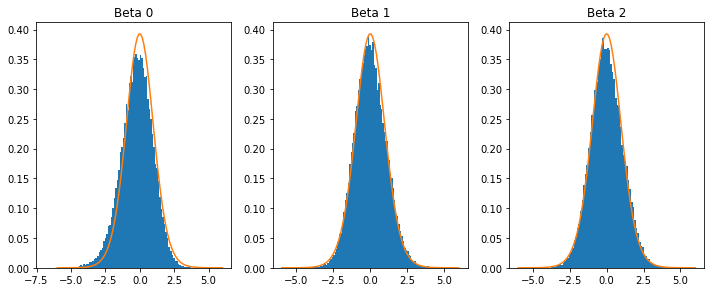

In [6]:
empirical_t(X[:20, :], betas)

Now we start to see deviations from the t-distribution. This analysis has been comforting though. It seems like if we have enough data points, the confidence intervals will still be reliable even if $\epsilon$ is non-normal.

## Generalized Least Squares

So far we've been assuming that the errors $\epsilon^{(i)}$ are uncorrelated and have the same variance. What if that's not the case? Consider, for instance, the following model:

\begin{equation}
Y = X\beta + \epsilon, \qquad
\epsilon \sim \mathcal{N}(0, \Omega).
\end{equation}

In other words, $\epsilon^{(1)}, \dots, \epsilon^{(m)}$ follow a multivariate normal distribution with zero mean and covariance matrix $\mathbb{E}[\epsilon^{(i)}\epsilon^{(i')}] = \Omega_{i i'}$. In this case, the probability of observing the dataset is

\begin{equation}
P(\beta) = \frac{1}{(2\pi|\Omega|)^{m/2}}\exp{\left[{-\frac{1}{2}(Y - X\beta)^T\Omega^{-1}(Y - X\beta)}\right]}.
\end{equation}

Following the principle of maximum likelihood, we can find the parameters $\hat{\beta}_{GLS}$ (GLS stands for, you guessed it, Generalized Least Squares) that maximize $P$, which is equivalent to minimizing the cost function

\begin{equation}
J(\beta) = \frac{1}{2m}(Y - X\beta)^T\Omega^{-1}(Y - X\beta).
\end{equation}

Differentiating w.r.t to $\beta$

\begin{equation}
\nabla J = \frac{1}{m}X^T\Omega^{-1}(X\beta - Y),
\end{equation}

and setting $\nabla J$ to zero, we find:

\begin{equation}
\hat{\beta}_{GLS} = (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}Y.
\end{equation}

This reduces to the expression we had derived for $\hat{\beta}_{OLS}$ when $\Omega = \sigma^2 I_m$.

Although we assumed a normal distribution to arrive at $\hat{\beta}_{GLS}$, as it turns out, $\hat{\beta}_{GLS}$ is BLUE under the more generic conditions:

\begin{equation}
\mathbb{E}[\epsilon] = 0, \qquad
\mathbb{E}[\epsilon\epsilon^T] = \Omega.
\end{equation}

The proof is very similar to that for OLS; we just need to insert $\Omega^{-1}$ in a bunch of places. First, note that $\hat{\beta}_{GLS}$ is unbiased:

\begin{align*}
\mathbb{E}[\hat{\beta}_{GLS}]
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} \mathbb{E}[Y] \\
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} (X\beta + \mathbb{E}[\epsilon]) \\
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}X\beta \\
    &= \beta.
\end{align*}

Using

\begin{align*}
\hat{\beta}_{GLS} - \beta
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}Y - (X^T\Omega^{-1}X)^{-1}(X^T\Omega^{-1}X)\beta \\
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}(Y - X\beta) \\
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}\epsilon,
\end{align*}

we can compute the covariance of $\hat{\beta}_{GLS}$:

\begin{align*}
C[\hat{\beta}_{GLS}]
    &= \mathbb{E}[(\hat{\beta}_{GLS} - \beta)(\hat{\beta}_{GLS} - \beta)^T] \\
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}\mathbb{E}[\epsilon \epsilon^T] \Omega^{-1}X(X^T\Omega^{-1}X)^{-1} \\
    &= (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} \Omega \Omega^{-1}X(X^T\Omega^{-1}X)^{-1} \\
    &= (X^T\Omega^{-1}X)^{-1}.
\end{align*}

Consider now some other linear estimator $\tilde{\beta}$:

\begin{equation}
\tilde{\beta} \equiv CY, \qquad
C \equiv (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} + D,
\end{equation}

where $D$ is any (for now) $(n+1)\times m$ dimensional matrix. We want $\tilde{\beta}$ to be unbiased:

\begin{align*}
\mathbb{E}[\tilde{\beta}]
    &= C\mathbb{E}[Y] \\
    &= CX\beta \\
    &= [(X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} + D]X\beta \\
    &= [I_{n+1} + DX]\beta,
\end{align*}

so we must have that

\begin{equation}
DX = 0.
\end{equation}

Let's compute the covariance $C[\tilde{\beta}]$ of $\tilde{\beta}$. First note that

\begin{align*}
\tilde{\beta} - \beta
    &= CY - [(X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}X + DX]\beta \\
    &= [(X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} + D]Y - [(X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} + D]X\beta \\
    &= [(X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} + D](Y - X\beta) \\
    &= C\epsilon,
\end{align*}

where the first equality uses $DX=0$. Then:

\begin{align*}
C[\tilde{\beta}]
    &= \mathbb{E}[(\tilde{\beta} - \beta)(\tilde{\beta} - \beta)^T] \\
    &= C\mathbb{E}[\epsilon\epsilon^T] C^T \\
    &= C \Omega C^T \\
    &= [(X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1} + D] \Omega [\Omega^{-1}X(X^T\Omega^{-1}X)^{-1} + D^T] \\
    &= (X^T\Omega^{-1}X)^{-1} + (X^T\Omega^{-1}X)^{-1}(DX)^T + (DX)(X^T\Omega^{-1}X)^{-1} + D\Omega D^T \\
    &= C[\hat{\beta}_{GLS}] + D\Omega D^T,
\end{align*}

where the we have used $DX=0$. Looking at the diagonal elements of this matrix equation, we can see how the variance of the two estimators compare:

\begin{equation}
C[\tilde{\beta}]_{jj} = C[\hat{\beta}_{GLS}]_{jj} + [D\Omega D^T]_{jj} \ge C[\hat{\beta}_{GLS}]_{jj},
\end{equation}

where we have used the fact that the diagonal elements of $D\Omega D^T$ are always non-negative:

\begin{align*}
[D\Omega D^T]_{jj}
    &= [D \mathbb{E}[\epsilon \epsilon^T] D^T]_{jj} \\
    &= \mathbb{E}[(D\epsilon) (D\epsilon)^T]_{jj} \\
    &= \mathbb{E}\left[[D\epsilon]_j^2\right] \\
    &\ge 0.
\end{align*}

Therefore, $\hat{\beta}_{GLS}$ is unbiased and has the lowest variance of all linear estimators, i.e. it's BLUE! Let's consider a concrete alternative linear estimator, our favourite OLS estimator $\hat{\beta}_{OLS}$:

\begin{equation}
\hat{\beta}_{OLS} = CY, \qquad
C = (X^TX)^{-1}X^T.
\end{equation}

It follows from the definition of $C$ that

\begin{equation}
D = (X^TX)^{-1}X^T - (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}.
\end{equation}

Is $\hat{\beta}_{OLS}$ still unbiased in a world where errors are correlated and don't have the same variance? All we need to do is compute $DX$:

\begin{equation}
DX = (X^TX)^{-1}X^TX - (X^T\Omega^{-1}X)^{-1}X^T\Omega^{-1}X = 0.
\end{equation}

Indeed! Although it's still unbiased, its variance is larger than $\hat{\beta}_{GLS}$, so we're better off using $\hat{\beta}_{GLS}$.

Assuming we know $\Omega$, we can easily calculate $\hat{\beta}_{GLS}$ and $C[\hat{\beta}_{GLS}]$, which in turn allows to construct confidence intervals, t-tests, etc. This, however, is only realistic in cases where the noise is well understood, for instance if it's due to some measuring device we have control over. What if we don't know $\Omega$? That's what we'll explore next.

## Heteroscedasticity

When the errors $\epsilon^{(i)}$ do not have the same variance, they are said to be *heteroscedastic*. As we argued in the previous section, if we have prior knowledge about the covariance matrix $\langle\epsilon^{(i)}\epsilon^{(i')}\rangle$, we can just use generalized least squares and call it a day. If we don't, life gets more complicated.

Let's construct a heteroscedastic data set using

\begin{equation}
y = 0.3 + 0.2x + \epsilon, \qquad
\epsilon = 0.2(0.3 + 0.2x)z, \qquad
z \sim \mathcal{N}(0, 1).
\end{equation}

As $x$ gets larger, the variance of $\epsilon$ also gets larger. We can also see this graphically:

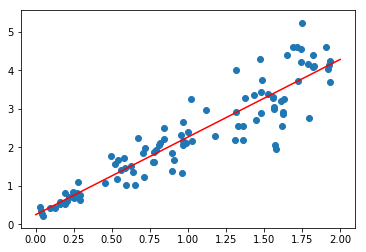

In [7]:
# Generate heteroscedastic data
m_het = 100
X_het = np.column_stack([np.ones(m_het), np.random.uniform(0, 2, size=m_het)])
_, p_het = X_het.shape
betas_het = np.array([0.3, 2])
het_sigmas = 0.2 * X_het.dot(betas_het)
y_het = X_het.dot(betas_het) + het_sigmas * np.random.normal(size=m_het)

# Fit OLS
model_het = regression.linear_model.OLS(y_het, X_het).fit()

# Plot data and line of best fit
x_plt = np.linspace(0, 2, m_het)
plt.plot(x_plt, model_het.params[0] + model_het.params[1] * x_plt, 'r-')
plt.scatter(X_het[:, 1], y_het);

Before exploring the implications of heteroscedasticity, let's see how we can detect it in our data tests.

### Breusch–Pagan test

The [Breusch-Pagan](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test) test proceeds as follows:

1. Assume homoscedasticity, i.e. the variance of errors does not change from one observation to another: $Y = X\beta + \epsilon$, where $\mathbb{E}[\epsilon] = 0$ and $\mathbb{E}[\epsilon\epsilon^T] = \sigma^2I_m$.
2. Fix the design matrix $X$, which as usual is an $m \times (n+1)$ dimensional matrix where $m$ is the number of observations and $n$ is the number of features (or independent variables).
3. Generate $m$ samples of $y$ and find the OLS estimates $\hat{\beta}$. Remember that even with homoscedastic noise, there's always a chance of getting a heteroscedastic-looking dataset.
4. Compute the square of residuals: $\hat{e}_i^2 = (y^{(i)} - \hat{\beta}^Tx^{(i)})^2$.
5. Regress the squared residuals against the features: $\hat{e}_i^2 = \gamma^Tx^{(i)} + \eta^{(i)}$, where $\gamma$ is the vector of regression parameters and $\eta$ is homoscedastic noise. Fine the OLS estimates $\hat{\gamma}$.
6. Compute $mR^2$ for the second regression, where as usual $R^2$ is the coefficient of determination. This is the Breusch–Pagan test-statistic. The idea is that if the errors depend on $x$, $R^2$ should be larger on average.
7. Repeat steps 3-6 to get a distribution for the Breusch–Pagan test-statistic.

Apparently it can be shown that the Breusch–Pagan test-statistic is asymptotically distributed as $\chi^2_n$. Below we verify this claim by running simulations using Gaussian noise.

In [8]:
def empirical_bp(X_, betas_r):
    """Determine the distribution of the Breusch–Pagan test-statistic using simulations.
    
    Args:
        X_ (numpy.ndarray): design matrix. It's a `m x (n+1)` dimensional matrix where
            `m` is the number of observations and `n` is the number of features
            (or independent variables).
        betas_r (numpy.ndarray): "real" value of parameters in linear regression, represented
            by a numpy array of length `n+1`.
    """
    (m, p) = X_.shape
    n = p - 1

    # Quantities that will not change during the simulation
    D = np.linalg.inv(X_.T.dot(X_))
    A = D.dot(X_.T)

    # Number of times to compute t values
    trials = 50000
    bp_vals = []

    for i in range(trials):
        # Simulate y
        y_ = X_.dot(betas_r) + np.random.normal(size=m)
        # OLS estimator
        betas_est = A.dot(y_)
        # Residuals
        e2 = (y_ - X_.dot(betas_est))**2
        # Standard error of estimates
        e2_betas_est = A.dot(e2)
        f_ = X_.dot(e2_betas_est)
        r2 = np.corrcoef(f_, e2)[0, 1]**2
        bp_vals.append(m * r2)

    # Plot results
    px = np.linspace(min(bp_vals), max(bp_vals), 1000)
    plt.plot(px, stats.chi2.pdf(px, n), label=r'$\chi^2_{0}$'.format(n))
    plt.hist(bp_vals, bins=100, normed=True)
    plt.title('Emprical Breusch-Pagan test-statistic distribution')
    plt.legend()

Let's generate a random $100 \times 5$-dimensional design matrix and also a random $\beta$ vector. Then, we can run the simulations and check the distribution of the Breusch-Pagan test-statistic empirically:

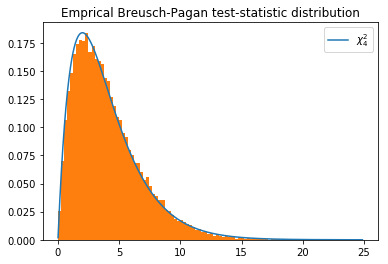

In [9]:
empirical_bp(
    np.column_stack([np.ones(100), np.random.uniform(size=(100, 4))]),
    np.random.uniform(size=(5,))
)

Very nice. It is almost certainly the case that the distribution doesn't depend on $X$ or the "true" regression parameters $\beta$, since we generated them randomly.

Let's go back to the heteroscedastic dataset we had generated previously. We can now run linear regression on the square of residuals and compute the Breusch-Pagan test-statistic:

In [10]:
model_resid = regression.linear_model.OLS(model_het.resid**2, X_het).fit()
bp_test = len(y_het) * model_resid.rsquared

print("Breusch-Pagan test-statistic = {0}".format(bp_test))

Breusch-Pagan test-statistic = 15.3732958511


Since we know the distribution of the test-statistic is $\chi^2_1$, we can compute the p-value:

In [11]:
bp_pval = 1 - stats.chi2.cdf(bp_test, 1)
print("Breusch-Pagan test-statistic = {0}".format(bp_pval))

Breusch-Pagan test-statistic = 8.82263842481e-05


As expected the p-value is small, so we can reject the null hypothesis that the data is homoscedastic. Of course, we already knew that, since we create the dataset!

`statsmodels` also has a function for computing the Breusch-Pagan test-statistic and its corresponding p-value:

In [12]:
bp_test_sm, bp_pval_sm, _, _ = diagnostic.het_breuschpagan(model_het.resid, X_het)

print("statsmodels Breusch-Pagan test-statistic = {0}".format(bp_test_sm))
print("statsmodels Breusch-Pagan p-value = {0}".format(bp_pval_sm))

statsmodels Breusch-Pagan test-statistic = 15.3732958511
statsmodels Breusch-Pagan p-value = 8.82263842481e-05


Excellent, our values match!

### Heteroscedasticity-consistent errors

So, what do we do about heteroscedasticity when it exists? Suppose the dataset is generated using the model

\begin{equation}
Y = X\beta + \epsilon, \qquad
\mathbb{E}[\epsilon]  = 0, \qquad
\mathbb{E}[\epsilon\epsilon^T] = \Omega,
\end{equation}

but we don't know what $\Omega$ is. How does the OLS estimator $\hat{\beta}_{OLS}$ cope in this world? Recall that

\begin{equation}
\hat{\beta}_{OLS} = (X^TX)^{-1}X^TY.
\end{equation}

In our discussion of generalized least squares, we showed that $\hat{\beta}_{OLS}$ is still unbiased. Here's another simple proof:

\begin{align*}
\mathbb{E}[\hat{\beta}_{OLS}]
    &= (X^TX)^{-1}X^T \mathbb{E}[Y] \\
    &= (X^TX)^{-1}X^T (X\beta + \mathbb{E}[\epsilon]) \\
    &= (X^TX)^{-1}X^TX\beta \\
    &= \beta.
\end{align*}

We also know from our GLS discussion that although $\hat{\beta}_{OLS}$ is unbiased, it no longer has the least variance amongst all linear estimators; that holy position is occupied by the generalized least squares estimator $\hat{\beta}_{GLS}$. Let's compute the covariance of $\hat{\beta}_{OLS}$. First note that

\begin{align*}
\hat{\beta}_{OLS} - \beta
    &= (X^TX)^{-1}X^T Y - (X^TX)^{-1}(X^TX)\beta \\
    &= (X^TX)^{-1}X^T(Y - X\beta) \\
    &= (X^TX)^{-1}X^T\epsilon.
\end{align*}

Then:

\begin{align*}
\text{C}[\hat{\beta}_{OLS}]
    &= \mathbb{E}[(\hat{\beta}_{OLS} - \beta)(\hat{\beta}_{OLS} - \beta)^T] \\
    &= (X^TX)^{-1}X^T \mathbb{E}[\epsilon\epsilon^T] X(X^TX)^{-1} \\
    &= (X^TX)^{-1}X^T \Omega X(X^TX)^{-1}.
\end{align*}

For homoscedastic errors, i.e. $\Omega = \sigma^2 I$, we recover the result $\text{C}[\hat{\beta}_{OLS}] = \sigma^2(X^TX)^{-1}$.

Now, we're assuming that we don't know $\Omega$, so we'll need to estimate the standard errors, confidence intervals, etc from our dataset. Is the OLS estimator $\hat{C}_{OLS}$ of the covariance matrix still unbiased? Remember that

\begin{equation}
\hat{C}_{OLS} = \frac{\hat{e}^T\hat{e}}{m-n-1}(X^TX)^{-1},
\end{equation}

where as usual $\hat{e}$ are the residuals:

\begin{equation}
\hat{e} = Y - X\hat{\beta}_{OLS}.
\end{equation}

The expectation value of residuals is still zero:

\begin{align*}
\mathbb{E}[\hat{e}]
    &= \mathbb{E}[Y] - X\mathbb{E}[\hat{\beta}_{OLS}] \\
    &= (X\beta + \mathbb{E}[\epsilon]) - X\beta \\
    &= 0.
\end{align*}

As before, we can rewrite $\hat{e}$ as follows:

\begin{align*}
\hat{e}
    &= Y - X\hat{\beta}_{OLS} \\
    &= Y - X(X^TX)^{-1}X^TY \\
    &= (I_m - X(X^TX)^{-1}X^T)Y,
\end{align*}

More simply:

\begin{equation}
\hat{e} = MY, \qquad M \equiv I_m - X(X^TX)^{-1}X^T.
\end{equation}

Let's compute the expectation value of the covariance of residuals:

\begin{align*}
\mathbb{E}[\hat{e}\hat{e}^T]
    &= M \mathbb{E}[YY^T] M^T \\
    &= M \mathbb{E}[(X\beta + \epsilon)(\beta^TX^T + \epsilon^T)] M^T \\
    &= M (X\beta\beta^TX^T + X\beta\mathbb{E}[\epsilon]^T + \mathbb{E}[\epsilon]\beta^TX^T + \mathbb{E}[\epsilon\epsilon^T])M \\
    &= (MX)(\beta\beta^T)(MX)^T + M\Omega M^T \\
    &= M\Omega M,
\end{align*}

where we have used $\mathbb{E}[\epsilon]=0$, $MX=0$, and $M=M^T$. Using this, we can compute the expectation value of the norm of the residuals:

\begin{equation}
\mathbb{E}[\hat{e}^T\hat{e}]
    = \text{tr}\left(\mathbb{E}[\hat{e}\hat{e}^T]\right)
    = \text{tr}(M\Omega M)
    = \text{tr}(M^2\Omega)
    = \text{tr}(M\Omega),
\end{equation}

where the third equality follows from the linear algebra identity $\text{tr}(AB)=\text{tr}(BA)$ and the last equality follows from $M^2=M$. We can now determine if $\hat{C}_{OLS}$ is biased or not:

\begin{align*}
\mathbb{E}[\hat{C}_{OLS}]
    &= \frac{\mathbb{E}[\hat{e}^T\hat{e}]}{m-n-1}(X^TX)^{-1} \\
    &= \frac{\text{tr}(M\Omega)}{m-n-1}(X^TX)^{-1}.
\end{align*}

When $\Omega = \sigma^2 I$: $\text{tr}(M\Omega)=\sigma^2\text{tr}(M)=\sigma^2(m-n-1)$, from which it follows that the covariance estimator is unbiased: $\mathbb{E}[\hat{C}_{OLS}] = \sigma^2(X^TX)^{-1}=\text{C}[\hat{\beta}_{OLS}]$. In the presence of heteroscedasticity, though, this will no longer hold:

\begin{align*}
\mathbb{E}[\hat{C}_{OLS}]
    &= \frac{\text{tr}(M\Omega)}{m-n-1}(X^TX)^{-1} \\
    &\neq (X^TX)^{-1}X^T \Omega X(X^TX)^{-1} \\
    &= \text{C}[\hat{\beta}_{OLS}].
\end{align*}

In our example above, we came up with $\Omega$ ourselves, so we can check this inequality:

In [13]:
XtX_inv = np.linalg.inv(X_het.T.dot(X_het))
M = np.identity(m_het) - X_het.dot(XtX_inv).dot(X_het.T)
Omega = np.diag(het_sigmas**2)

print("Expectation value of the OLS covariance estimate")
print("------------------------------------------------")
print(np.trace(M.dot(Omega))/(m_het - 2) * XtX_inv)
print("")
print("Actual covariance of the OLS betas")
print("------------------------------------------------")
print(XtX_inv.dot(X_het.T).dot(Omega).dot(X_het).dot(XtX_inv))

Expectation value of the OLS covariance estimate
------------------------------------------------
[[ 0.0108881  -0.00806824]
 [-0.00806824  0.00795902]]

Actual covariance of the OLS betas
------------------------------------------------
[[ 0.0041587  -0.00508216]
 [-0.00508216  0.00861837]]


To summarize, the OLS estimator $\hat{\beta}_{OLS}$ of regression parameters is unbiased, but the OLS estimator of their covariance $\hat{C}_{OLS}$ is biased. Recall that the standard errors, confidence intervals, and t-tests we derived for OLS were assuming $\hat{C}_{OLS}$ is unbiased. Therefore, in the presence of hederoscedasticity, $\hat{C}_{OLS}$ may lead to confidence intervals that are either too liberal or conservative. In the example above, for instance, the standard error of $\hat{\beta}_0$ is overestimated by a factor of $\sim 1.6$.

What to do? This is where *[hederoscedastically-consistent](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors)* (HC) estimators come in. They are a family of estimators that do a much better job than $\hat{C}_{OLS}$. Let's assume that $\Omega$ is diagonal, but that the diagonal elements are not the same (this is the case for our example above). Here's one HC estimator:

\begin{equation}
\hat{C}_{HC0} = (X^TX)^{-1}X^T\hat{\Omega}X(X^TX)^{-1}, \qquad
\hat{\Omega}_{ij} = \hat{e}_i^2\delta_{ij}.
\end{equation}

This expression looks very similar to $C[\hat{\beta}_{OLS}]=(X^TX)^{-1}X^T \Omega X(X^TX)^{-1}$, except that the unknown covariance matrix $\Omega$ is now replaced by the diagonal matrix of squared residuals. Note that

\begin{equation}
\mathbb{E}[\hat{C}_{HC0}] = (X^TX)^{-1}X^T \mathbb{E}[\hat{\Omega}] X(X^TX)^{-1},
\end{equation}

where

\begin{align*}
\mathbb{E}[\hat{\Omega}]_{ij}
    &= \mathbb{E}[\hat{e}_i^2]\delta_{ij} \\
    &= [M \Omega M]_{ii} \delta_{ij}.
\end{align*}

So if $[M \Omega M]_{ii} \approx \Omega_{ii}$, $\hat{C}_{HC0}$ will be very close to being unbiased, i.e. $\mathbb{E}[ \hat{C}_{HC0}] \approx C[\hat{\beta}_{OLS}]$. Let's check this for our toy-example:

In [14]:
resid2_exp = np.diag(M.dot(Omega).dot(M))

print("-----------Expectation value of HC0-------------")
XtX_inv.dot(X_het.T).dot(np.diag(resid2_exp)).dot(X_het).dot(XtX_inv)

-----------Expectation value of HC0-------------


array([[ 0.00409909, -0.00496052],
       [-0.00496052,  0.00838146]])

Notice how much closer $\mathbb{E}[\hat{C}_{HC0}]$ is to $C[\hat{\beta}_{OLS}]$ than $\mathbb{E}[\hat{C}_{OLS}]$! There are other such proposals (http://www.afhayes.com/public/BRM2007.pdf), where in each case $\hat{\Omega}$ is constructed differently:

1. HC1:
\begin{equation}
    \hat{\Omega}_{ij} = \frac{m}{m-n-1}\hat{e}_i^2\delta_{ij}
\end{equation}

2. HC2:
\begin{equation}
    \hat{\Omega}_{ij} = \frac{\hat{e}_i^2}{1-H_{ii}}\delta_{ij}, \qquad
    H \equiv X(X^TX)^{-1}X^T.
\end{equation}

3. HC2:
\begin{equation}
    \hat{\Omega}_{ij} = \frac{\hat{e}_i^2}{(1-H_{ii})^2}\delta_{ij}, \qquad
    H \equiv X(X^TX)^{-1}X^T.
\end{equation}

We can similarly compute $\mathbb{E}[\hat{C}_{HC1}]$, $\mathbb{E}[\hat{C}_{HC2}]$, and $\mathbb{E}[\hat{C}_{HC3}]$ by using $\mathbb{E}[e_{i}^2] = [M\Omega M]_{ii}$. Let's look at these for our toy example:

In [15]:
H_diag = np.diag(X_het.dot(XtX_inv).dot(X_het.T))

print("-----------Expectation value of HC1-------------")
Omega_hc1_exp = np.diag(resid2_exp) * m_het / (m_het - 2)
print(XtX_inv.dot(X_het.T).dot(Omega_hc1_exp).dot(X_het).dot(XtX_inv))

print("")

print("-----------Expectation value of HC2-------------")
Omega_hc2_exp = np.diag(resid2_exp / (1 - H_diag))
print(XtX_inv.dot(X_het.T).dot(Omega_hc2_exp).dot(X_het).dot(XtX_inv))

print("")

print("-----------Expectation value of HC3-------------")
Omega_hc3_exp = np.diag(resid2_exp / (1 - H_diag)**2)
print(XtX_inv.dot(X_het.T).dot(Omega_hc3_exp).dot(X_het).dot(XtX_inv))

-----------Expectation value of HC1-------------
[[ 0.00418275 -0.00506176]
 [-0.00506176  0.00855251]]

-----------Expectation value of HC2-------------
[[ 0.00419983 -0.00509732]
 [-0.00509732  0.00860822]]

-----------Expectation value of HC3-------------
[[ 0.00430339 -0.00523816]
 [-0.00523816  0.00884154]]


They all approximate $C[\hat{\beta}_{OLS}]$ very well, particularly HC2 in our specific example.

`statsmodels` actually computes the various HC estimators for us:

In [16]:
print("-----------statsmodels HC0-------------")
print(model_het.cov_HC0)
print("-----------reproduced  HC0-------------")
Omega_hc0 = np.diag(model_het.resid**2)
print(XtX_inv.dot(X_het.T).dot(Omega_hc0).dot(X_het).dot(XtX_inv))

print("")

print("-----------statsmodels HC1-------------")
print(model_het.cov_HC1)
print("-----------reproduced  HC1-------------")
Omega_hc1 = np.diag(model_het.resid**2) * m_het / (m_het - 2)
print(XtX_inv.dot(X_het.T).dot(Omega_hc1).dot(X_het).dot(XtX_inv))

print("")

print("-----------statsmodels HC2-------------")
print(model_het.cov_HC2)
print("-----------reproduced  HC2-------------")
Omega_hc2 = np.diag(model_het.resid**2 / (1 - H_diag))
print(XtX_inv.dot(X_het.T).dot(Omega_hc2).dot(X_het).dot(XtX_inv))

print("")

print("-----------statsmodels HC3-------------")
print(model_het.cov_HC3)
print("-----------reproduced HC3--------------")
Omega_hc3 = np.diag(model_het.resid**2 / (1 - H_diag)**2)
print(XtX_inv.dot(X_het.T).dot(Omega_hc3).dot(X_het).dot(XtX_inv))

-----------statsmodels HC0-------------
[[ 0.00304848 -0.00352732]
 [-0.00352732  0.00629034]]
-----------reproduced  HC0-------------
[[ 0.00304848 -0.00352732]
 [-0.00352732  0.00629034]]

-----------statsmodels HC1-------------
[[ 0.00311069 -0.00359931]
 [-0.00359931  0.00641871]]
-----------reproduced  HC1-------------
[[ 0.00311069 -0.00359931]
 [-0.00359931  0.00641871]]

-----------statsmodels HC2-------------
[[ 0.00311246 -0.00361205]
 [-0.00361205  0.00643999]]
-----------reproduced  HC2-------------
[[ 0.00311246 -0.00361205]
 [-0.00361205  0.00643999]]

-----------statsmodels HC3-------------
[[ 0.00317797 -0.00369894]
 [-0.00369894  0.00659339]]
-----------reproduced HC3--------------
[[ 0.00317797 -0.00369894]
 [-0.00369894  0.00659339]]


Let's compare the model summary using OLS error estimates v.s. HC1:

In [17]:
print("************* Model summary using OLS error estimates *************")
model_het.summary()

************* Model summary using OLS error estimates *************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     572.8
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.01e-42
Time:                        19:52:41   Log-Likelihood:                -69.723
No. Observations:                 100   AIC:                             143.4
Df Residuals:                      98   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2537      0.098      2.578      0.011       0.058       0.449
x1             2.0136      0.084     23.933      0.000       1.847       2.181
==============================================================================
Omnibus:                        4.705   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                6.299
Skew:                          -0.057   Prob(JB):                       0.0429
Kurtosis:                       4.224   Cond. No.                         3.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model_hc1 = regression.linear_model.OLS(y_het, X_het).fit(cov_type="HC1")

print("************* Model summary using HC1 error estimates *************")
model_hc1.summary()

************* Model summary using HC1 error estimates *************


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     631.7
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.63e-44
Time:                        19:52:41   Log-Likelihood:                -69.723
No. Observations:                 100   AIC:                             143.4
Df Residuals:                      98   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2537      0.056      4.549      0.000       0.144       0.363
x1             2.0136      0.080     25.133      0.000       1.857       2.171
==============================================================================
Omnibus:                        4.705   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                6.299
Skew:                          -0.057   Prob(JB):                       0.0429
Kurtosis:                       4.224   Cond. No.                         3.80
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Note that the $2.5\% \to 97.5\%$ HC1 confidence interval for $\hat{\beta}_0$ is much tighter: $(0.144, 0.363)$ vs $(0.058, 0.449)$. The discrepancy for $\hat{\beta}_1$ is not as pronounced.

The HC1 confidence intervals can be reproduced as follows:

In [19]:
statsmodels_ci = model_hc1.conf_int()
z = stats.norm.ppf(1 - 0.05/2.)

for i, beta_ in enumerate(model_hc1.params):
    beta_se = np.sqrt(model_hc1.cov_params()[i, i])
    print("statsmodels Beta_{0} 95% confidence interval = ({1}, {2})".format(
        i,
        statsmodels_ci[i, 0], statsmodels_ci[i, 1]
    ))
    print("Reproduced  Beta_{0} 95% confidence interval = ({1}, {2})".format(
        i,
        beta_ - z*beta_se, beta_ + z*beta_se
    ))
    print("")

statsmodels Beta_0 95% confidence interval = (0.144415810171, 0.36304422975)
Reproduced  Beta_0 95% confidence interval = (0.144415810171, 0.36304422975)

statsmodels Beta_1 95% confidence interval = (1.8565358768, 2.17058821019)
Reproduced  Beta_1 95% confidence interval = (1.8565358768, 2.17058821019)



Notice that unlike OLS, the normal distribution is used instead of the t-distribution with $m-2$ degrees of freedom. The difference, though, is pretty small in thise case, since there are $100$ examples. The t-values can also be reproduced as follows:

In [20]:
for i in range(len(model_hc1.params)):
    print("statsmodels Beta_{0} t-value = {1}".format(i, model_hc1.tvalues[i]))
    print("Reproduced  Beta_{0} t-value = {1}".format(
        i,
        model_hc1.params[i] / np.sqrt(model_hc1.cov_params()[i, i])
    ))
    print("")

statsmodels Beta_0 t-value = 4.54928688481
Reproduced  Beta_0 t-value = 4.54928688481

statsmodels Beta_1 t-value = 25.1328117402
Reproduced  Beta_1 t-value = 25.1328117402



Again, the corresponding p-values come from the normal distribution, and not the t-distribution:

In [21]:
for i in range(len(model_hc1.params)):
    print("statsmodels Beta_{0} p-value = {1}".format(i, model_hc1.pvalues[i]))
    print("Reproduced  Beta_{0} p-value = {1}".format(
        i,
        2*stats.norm.cdf(-abs(model_hc1.tvalues[i]))
    ))
    print("")

statsmodels Beta_0 p-value = 5.38280171761e-06
Reproduced  Beta_0 p-value = 5.38280171761e-06

statsmodels Beta_1 p-value = 2.17857814744e-139
Reproduced  Beta_1 p-value = 2.17857814744e-139



Our [derivation](https://nbviewer.jupyter.org/github/siavashaslanbeigi/stats_notes/blob/master/multi_linreg.ipynb) of the F-test is also impacted by heteroscedasticity. Recall that the null-hypothesis is given by the matrix equation

\begin{equation}
R\beta = r,
\end{equation}

where $R$ is a $q \times (n+1)$ full-rank matrix and $r$ is a $q$-dimensional vector. Let 

\begin{equation}
B \equiv R C_{OLS} R^T, \qquad
W \equiv B^{-1/2}R(\hat{\beta} - \beta),
\end{equation}

where $C_{OLS} \equiv C[\hat{\beta}_{OLS}]=(X^TX)^{-1}X^T \Omega X(X^TX)^{-1}$. Then

\begin{align*}
\mathbb{E}[WW^T]
    &= B^{-1/2}R \mathbb{E}[(\hat{\beta} - \beta)(\hat{\beta} - \beta)^T] R^T B^{-1/2} \\
    &= B^{-1/2}[R C_{OLS} R^T]B^{-1/2} \\
    &= B^{-1/2}BB^{-1/2} \\
    &= I_q.
\end{align*}

Therefore, $W$ is a $q$-dimensional vector of independent standard normals, which in turn implies that $W^TW \sim \chi^2_{q}$:

\begin{align*}
W^TW
    &= (R\hat{\beta} - R\beta)^TB^{-1/2}B^{-1/2}(R\hat{\beta} - R\beta) \\
    &= (R\hat{\beta} - r)^TB^{-1}(R\hat{\beta} - r) \\
    &= (R\hat{\beta} - r)^T\left[R C_{OLS} R^T\right]^{-1}(R\hat{\beta} - r).
\end{align*}

Of course, we don't know $C_{OLS}$, so we have to estimate it from the data. Suppose we have homoscedastic errors, i.e. $\Omega = \sigma^2 I$. Let's see what happens if we substitute $\hat{C}_{OLS}$ instead of $C_{OLS}$:

\begin{align*}
(R\hat{\beta} - r)^T\left[R \hat{C}_{OLS} R^T\right]^{-1}(R\hat{\beta} - r)
    &= (R\hat{\beta} - r)^T\left[R \left(\frac{\hat{e}^T\hat{e}}{m-n-1}(X^TX)^{-1}\right) R^T\right]^{-1}(R\hat{\beta} - r) \\
    &= \frac{(R\hat{\beta} - r)^T\left[R (X^TX)^{-1} R^T\right]^{-1}(R\hat{\beta} - r)}{\hat{e}^T\hat{e}/(m-n-1)} \\
    &= q f_{OLS},
\end{align*}

where $f_{OLS}$ is the F-statistic we derived for OLS. This result suggests the following test-statistic in the presence of heteroscedasticity:

\begin{equation}
f_{HC} = (R\hat{\beta} - r)^T\left[R \hat{C}_{HC} R^T\right]^{-1}(R\hat{\beta} - r) / q,
\end{equation}

where $\hat{C}_{HC}$ is some heteroscedastically-consistent estimate of the covariance matrix. This is indeed what `statsmodels` reports:

In [22]:
e_hc1 = y_het - X_het.dot(model_hc1.params)
R = np.column_stack((np.zeros(p_het - 1), np.identity(p_het - 1)))
R_beta = R.dot(model_hc1.params)

ftest = R_beta.T.dot(np.linalg.inv(R.dot(model_hc1.cov_params()).dot(R.T))).dot(R_beta) / R.shape[0]
print("statsmodels F-statistic = {}".format(model_hc1.fvalue[0, 0]))
print("Reproduced  F-statistic = {}".format(ftest))

statsmodels F-statistic = 631.65822597
Reproduced  F-statistic = 631.65822597


Recall that the null hypothesis being tested here is $\beta_1=\dots=\beta_n$=0, which is equivalent to $R = [0_{n \times 1} I_{n \times n}]$ and $r = 0_{n \times 1}$.

Let's try another F-test, this time using:

\begin{equation}
R = \begin{pmatrix}
    2 & -0.3
\end{pmatrix}, \qquad
r = 0.
\end{equation}

This is equivalent to testing the null hypothesis $2\beta_0 - 0.3\beta_1 = 0$, which is actually true for the example we've been considering.

In [23]:
R2 = np.array([[2, -0.3]])
R2_beta = R2.dot(model_hc1.params)

statsmodels_f2 = model_hc1.f_test(R2)
ftest2 = R2_beta.T.dot(np.linalg.inv(R2.dot(model_hc1.cov_params()).dot(R2.T))).dot(R2_beta) / R2.shape[0]
print("statsmodels F-statistic = {}".format(statsmodels_f2.fvalue[0, 0]))
print("Reproduced  F-statistic = {}".format(ftest2))
print("")
print("statsmodels F-test p-value = {}".format(statsmodels_f2.pvalue))
print("Reproduced  F-test p-value = {}".format(1 - stats.f.cdf(ftest2, R2.shape[0], m_het - p_het)))

statsmodels F-statistic = 0.538259462364
Reproduced  F-statistic = 0.538259462364

statsmodels F-test p-value = 0.464906507504
Reproduced  F-test p-value = 0.464906507504


Excellent, we're also able to reproduce the p-value. When errors are homoscedastic and normally distributed, we know that $f_{OLS} \sim F_{q, m-n-1}$. What about $f_{HC}$? Let's verify this by running simulations: 

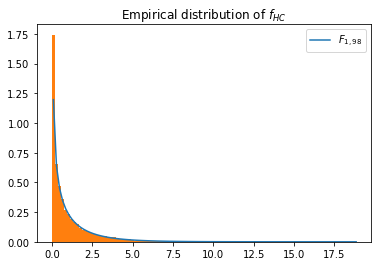

In [24]:
# Number of times to compute t values
fvals = []

for i in range(10000):
    # Simulate y
    y_ = X_het.dot(betas_het) + het_sigmas * np.random.normal(size=m_het)
    # Fit model
    model_ = regression.linear_model.OLS(y_, X_het).fit(cov_type="HC1")
    fval_ = model_.f_test(R2)
    fvals.append(fval_.fvalue[0, 0])

# Plot results
fx = np.linspace(0.1, max(fvals), 100)
plt.plot(fx, stats.f.pdf(fx, R2.shape[0], m_het - p_het), label=r"$F_{1,98}$")
plt.hist(fvals, bins=100, normed=True)
plt.title("Empirical distribution of " + r"$f_{HC}$")
plt.legend();

Looks good! Of course, this is not a mathematical proof.